# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months: cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months: cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
air = pd.read_csv('EastWestAirlines.csv')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Drop the ID column since it is not useful for clustering
air.drop('ID#', axis=1, inplace=True)

In [4]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
air.shape

(3999, 11)

In [6]:
air.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
air_norm = preprocessing.scale(air)
air_norm = pd.DataFrame(air_norm)
air_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


HIERARCHICAL CLUSTERING

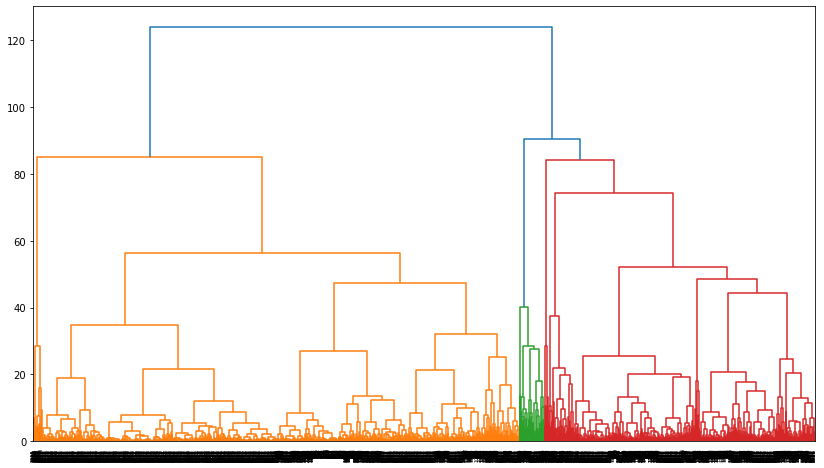

In [10]:
# create dendrogram
plt.figure(figsize = (14, 8));
dendrogram = sch.dendrogram(sch.linkage(air_norm, method='ward'))

In [11]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(air_norm)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,0
3997,1


In [12]:
air1 = pd.concat([air, Clusters], axis = 1)
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [13]:
air1.sort_values('Clusters')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1455,49438,0,4,1,1,33912,14,0,0,5085,1,0
1453,190208,0,4,1,1,37122,38,1800,6,5091,0,0
1452,147822,0,4,1,1,42469,18,0,0,5107,1,0
1450,118601,0,5,1,1,51240,19,0,0,5105,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
226,117329,0,1,2,1,6448,11,0,0,7416,1,3
2967,8210,0,1,2,1,9122,16,0,0,3312,1,3
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,3
2006,101901,0,1,2,1,17898,22,100,1,4433,0,3


In [14]:

labels = hc.labels_


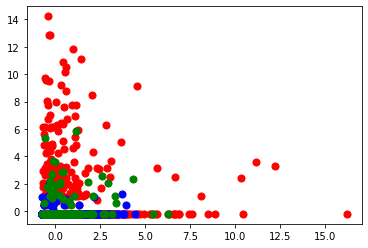

In [15]:
plt.scatter(air_norm.iloc[labels==0, 0], air_norm.iloc[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(air_norm.iloc[labels==1, 0], air_norm.iloc[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(air_norm.iloc[labels==2, 0], air_norm.iloc[labels==2, 1], s=50, marker='o', color='green')
plt.show()

 K-MEANS CLUSTERING

In [16]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(air)

KMeans(n_clusters=14, random_state=0)

In [17]:
kmeans.inertia_

1841543617565.6858

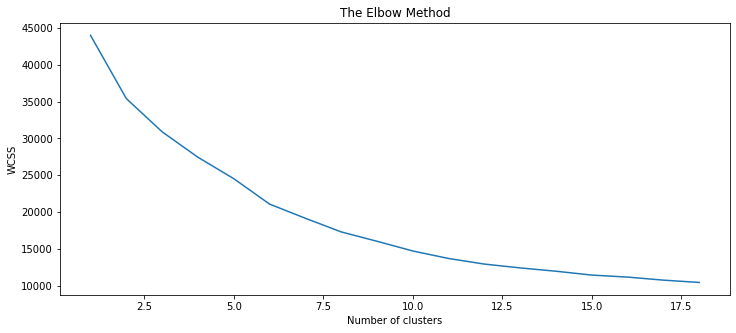

In [18]:
plt.figure(figsize=(12, 5))
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 19), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#OR Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(air)

KMeans(n_clusters=7, random_state=0)

In [20]:
clusters_new.labels_

array([3, 3, 3, ..., 0, 0, 3])

In [21]:
# Converting array to dataframe
data = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])
air2 = pd.concat([air, data], axis=1)
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
air2.groupby('Cluster ID').agg(['mean']).reset_index()

,Cluster ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,6.477379e+04,113.474227,2.509841,1.011246,1.020619,22180.064667,14.026242,471.448922,1.356139,4283.437676,0.410497
1,1,1.276013e+05,231.219130,3.003478,1.013913,1.041739,32192.721739,16.413913,784.533913,2.299130,4747.923478,0.455652
2,2,3.948273e+05,465.400000,3.188235,1.035294,1.000000,48679.482353,19.176471,1522.247059,4.682353,5859.458824,0.717647
3,3,1.982262e+04,96.539196,1.368844,1.017588,1.000000,5970.943216,7.607035,215.185427,0.674874,3614.975879,0.285427
4,4,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000
5,5,2.210648e+05,303.074510,2.917647,1.000000,1.000000,34492.215686,18.105882,1094.184314,3.137255,5107.835294,0.505882
6,6,7.283600e+05,258.636364,3.500000,1.000000,1.136364,62470.818182,22.000000,1600.909091,5.727273,6189.681818,0.863636


In [23]:
air2['Cluster ID'].value_counts()

3    1990
0    1067
1     575
5     255
2      85
6      22
4       5
Name: Cluster ID, dtype: int64

DBSCAN

In [24]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
air = air.values
air

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [26]:
stscaler = StandardScaler().fit(air)
X1 = stscaler.transform(air)
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(X1)

DBSCAN(eps=1, min_samples=4)

In [27]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
arr1 = air
arr2 = dbscan.labels_
arr2 = arr2.reshape(len(arr2), 1)  # reshape to a 2D array
arr = np.concatenate([arr1, arr2], axis=1)
air3 = pd.DataFrame(arr, columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?'] + ['Cluster'])
air3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [29]:
air3['Cluster'].value_counts()

 0    2331
 1    1098
-1     529
 2      13
 7       9
 4       7
 6       5
 5       4
 3       3
Name: Cluster, dtype: int64

# 2. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Data Description: Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States

In [30]:
crime = pd.read_csv('crime_data.csv')
crime.columns = ['City','murder','Assault','UrbanPop','Rape']
crime

,City,murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [31]:
Total = crime.sum(numeric_only=True, axis =1)
crime['Total'] = Total
crime

,City,murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6
5,Colorado,7.9,204,78,38.7,328.6
6,Connecticut,3.3,110,77,11.1,201.4
7,Delaware,5.9,238,72,15.8,331.7
8,Florida,15.4,335,80,31.9,462.3
9,Georgia,17.4,211,60,25.8,314.2


In [32]:
crime.head()

,City,murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [33]:
crime.isna().sum()

City        0
murder      0
Assault     0
UrbanPop    0
Rape        0
Total       0
dtype: int64

In [34]:
crime.shape

(50, 6)

In [35]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
 5   Total     50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [36]:
crime.describe()

,murder,Assault,UrbanPop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


HEIRARCHICAL CLUSTERING

In [37]:
n = MinMaxScaler()
data = n.fit_transform(crime.iloc[:,1:].to_numpy())
crime1 = pd.DataFrame(data, columns = crime.columns[1:])
crime1.head()

,murder,Assault,UrbanPop,Rape,Total
0,0.746988,0.654110,0.440678,0.359173,0.637029
1,0.554217,0.746575,0.271186,0.961240,0.737598
2,0.439759,0.852740,0.813559,0.612403,0.866631
3,0.481928,0.496575,0.305085,0.315245,0.474112
4,0.493976,0.791096,1.000000,0.860465,0.876118


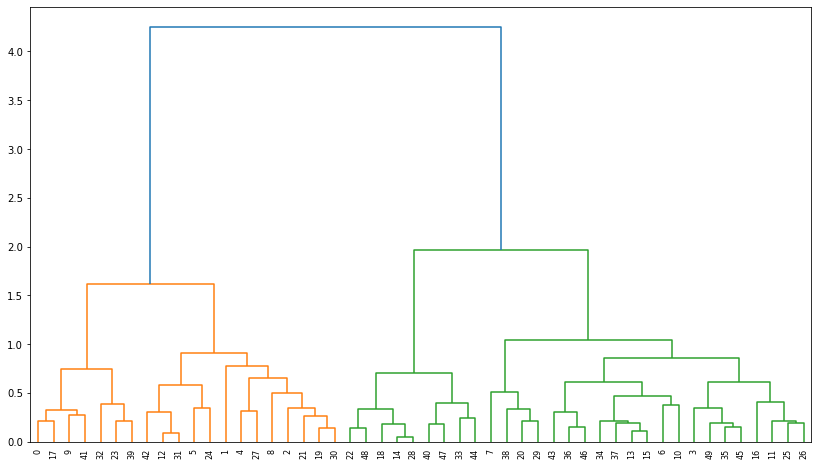

In [38]:
#dendrogram
plt.figure(figsize = (14, 8));
dendrogram = sch.dendrogram(sch.linkage(crime1, method='ward'))

In [39]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(crime1)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,3
1,1
2,1
3,0
4,1


In [40]:
crime2 = pd.concat([crime1, Clusters],axis=1)
crime2.head()

,murder,Assault,UrbanPop,Rape,Total,Clusters
0,0.746988,0.654110,0.440678,0.359173,0.637029,3
1,0.554217,0.746575,0.271186,0.961240,0.737598,1
2,0.439759,0.852740,0.813559,0.612403,0.866631,1
3,0.481928,0.496575,0.305085,0.315245,0.474112,0
4,0.493976,0.791096,1.000000,0.860465,0.876118,1


In [41]:
crime2.sort_values("Clusters").reset_index()

,index,murder,Assault,UrbanPop,Rape,Total,Clusters
0,49,0.361446,0.397260,0.474576,0.214470,0.406614,0
1,29,0.397590,0.390411,0.966102,0.297158,0.490106,0
2,20,0.216867,0.356164,0.898305,0.232558,0.437246,0
3,34,0.391566,0.256849,0.728814,0.364341,0.353212,0
4,16,0.536145,0.219178,0.338983,0.232558,0.253727,0
5,15,0.313253,0.239726,0.576271,0.276486,0.302521,0
6,35,0.349398,0.363014,0.610169,0.328165,0.412578,0
7,13,0.385542,0.232877,0.559322,0.354005,0.305774,0
8,26,0.210843,0.195205,0.508475,0.237726,0.247764,0
9,11,0.108434,0.256849,0.372881,0.178295,0.264028,0


In [42]:
crime2['Clusters'].value_counts()

0    21
1    13
2     9
3     7
Name: Clusters, dtype: int64

K-MEANS CLUSTERING

In [43]:
x = crime[['murder','Assault','UrbanPop','Rape']]
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.64788892],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.02893964],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.51783489],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.03060731],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.55378307],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.6499431 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.65651649],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.68178292],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  2.0231636 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.50204202],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.1382221 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.76538812],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.03818345],
       [-0.13637203, -0.70012057, -0.0

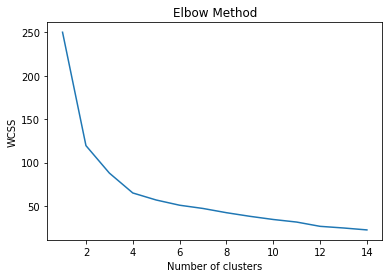

In [44]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [45]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [46]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [47]:
df4 = pd.DataFrame(clusters_new.labels_, columns =['clusters'])
crimes3 = pd.concat([crime, df4], axis=1)
crimes3.head()

,City,murder,Assault,UrbanPop,Rape,Total,clusters
0,Alabama,13.2,236,58,21.2,328.4,3
1,Alaska,10.0,263,48,44.5,365.5,1
2,Arizona,8.1,294,80,31.0,413.1,1
3,Arkansas,8.8,190,50,19.5,268.3,3
4,California,9.0,276,91,40.6,416.6,1


In [48]:
crimes3['clusters'].value_counts()

2    17
0    13
1    12
3     8
Name: clusters, dtype: int64

DBSCAN 

In [49]:
crime1.head()

,murder,Assault,UrbanPop,Rape,Total
0,0.746988,0.654110,0.440678,0.359173,0.637029
1,0.554217,0.746575,0.271186,0.961240,0.737598
2,0.439759,0.852740,0.813559,0.612403,0.866631
3,0.481928,0.496575,0.305085,0.315245,0.474112
4,0.493976,0.791096,1.000000,0.860465,0.876118


In [50]:
crime4 = crime1.values
crime4

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313, 0.63702901],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 0.73759827],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 , 0.86663052],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548, 0.47411223],
       [0.4939759 , 0.79109589, 1.        , 0.86046512, 0.87611819],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951, 0.63757116],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121, 0.29276227],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824, 0.64597452],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891, 1.        ],
       [1.        , 0.56849315, 0.47457627, 0.47803618, 0.59853619],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333, 0.16562754],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457, 0.26402819],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455, 0.74003795],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517, 0.30577392],
       [0.08433735, 0.03767123, 0.

In [51]:
stscaler = StandardScaler().fit(crime4)
X2 = stscaler.transform(crime4)
dbscan_crime = DBSCAN(eps=0.98, min_samples=3)
dbscan_crime.fit(X2)

DBSCAN(eps=0.98, min_samples=3)

In [52]:
dbscan_crime.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1, -1, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [53]:
crime5 = pd.DataFrame(dbscan_crime.labels_,columns=['Cluster ID'])
crime5.value_counts()

Cluster ID
 1            26
-1            14
 0             4
 2             3
 3             3
dtype: int64

In [54]:
crimes6 = pd.concat([crime,crime5],axis=1)
crimes6

,City,murder,Assault,UrbanPop,Rape,Total,Cluster ID
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,-1
2,Arizona,8.1,294,80,31.0,413.1,-1
3,Arkansas,8.8,190,50,19.5,268.3,-1
4,California,9.0,276,91,40.6,416.6,-1
5,Colorado,7.9,204,78,38.7,328.6,-1
6,Connecticut,3.3,110,77,11.1,201.4,1
7,Delaware,5.9,238,72,15.8,331.7,-1
8,Florida,15.4,335,80,31.9,462.3,-1
9,Georgia,17.4,211,60,25.8,314.2,0


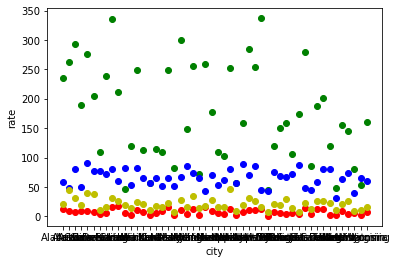

In [55]:
# scatter plot
plt.scatter(crime.City, crime.murder, color='r')
plt.scatter(crime.City, crime.Assault, color='g')
plt.scatter(crime.City, crime.UrbanPop, color='b')
plt.scatter(crime.City, crime.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()